In [359]:
import pandas as pd
import numpy as np
import scipy
import os

RQ1_DATA_FOLDER_PATH = "../experiment_data/RQ1_data/"

subfolders = [f for f in os.listdir(RQ1_DATA_FOLDER_PATH)
              if os.path.isdir(os.path.join(RQ1_DATA_FOLDER_PATH, f))]

rq_1_df = pd.DataFrame()

for folder in subfolders:
    xlsx_files = [f for f in os.listdir(
        RQ1_DATA_FOLDER_PATH+folder) if f.endswith(".xlsx")]
    for xlsx_file in xlsx_files:
        xlsx_file_path = RQ1_DATA_FOLDER_PATH + f"{folder}/{xlsx_file}"
        temp_df = pd.read_excel(xlsx_file_path)
        temp_df["participant"] = folder
        rq_1_df = pd.concat([rq_1_df, temp_df], ignore_index=True)


In [360]:
code_snippets = {
    1: """public void cleanCache(File dir, Formatter sbuff, boolean isRoot) {
    long now = System.currentTimeMillis();
    File[] files = dir.listFiles();
    if (files == null) {
      throw new IllegalStateException( "DiskCache2: not a directory or I/O error on dir="+dir.getAbsolutePath());
    }

    
    if (!isRoot && (files.length == 0)) {
      long duration = now - dir.lastModified();
      duration /= 1000 * 60;
      if (duration > persistMinutes) {
        boolean ok = dir.delete();
        if (!ok)
          cacheLog.error("Unable to delete file " + dir.getAbsolutePath());
        if (sbuff != null)
          sbuff.format(" deleted %s %s lastModified= %s%n", ok, dir.getPath(), CalendarDate.of(dir.lastModified()));
      }
      return;
    }

    
    for (File file : files) {
      if (file.isDirectory()) {
        cleanCache(file, sbuff, false);
      } else {
        long duration = now - file.lastModified();
        duration /= 1000 * 60;
        if (duration > persistMinutes) {
          boolean ok = file.delete();
          if (!ok)
            cacheLog.error("Unable to delete file " + file.getAbsolutePath());
          if (sbuff != null)
            sbuff.format(" deleted %s %s lastModified= %s%n", ok, file.getPath(), CalendarDate.of(file.lastModified()));
        }
      }
    }
  }""",
    2: """public boolean[] asBoolArray() {
        boolean[] retval;
        UBArray array = asArray();
        switch(array.getStrongType()){
            case Int8: {
                byte[] data = ((UBInt8Array) array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }

            case Int16: {
                short[] data = ((UBInt16Array) array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }

            case Int32: {
                int[] data = ((UBInt32Array)array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }

            case Int64: {
                long[] data = ((UBInt64Array)array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }

            case Float32: {
                float[] data = ((UBFloat32Array) array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }

            case Float64: {
                double[] data = ((UBFloat64Array) array).getValues();
                retval = new boolean[data.length];
                for (int i = 0; i < data.length; i++) {
                    retval[i] = data[i] > 0;
                }
                break;
            }


            default:
                throw new RuntimeException("not an int32[] type");
        }

        return retval;
    }""",
    3: """Acquire a FileCacheable from the cache, and lock it so no one else can use it.
If not already in cache, open it with FileFactory, and put in cache.
<p/>
Call FileCacheable.close() when done, (rather than FileCacheIF.release() directly) and the file is then released instead of closed.
<p/>
If cache size goes over maxElement, then immediately (actually in 100 msec) schedule a cleanup in a background thread.
This means that the cache should never get much larger than maxElement, unless you have them all locked.

@param factory     use this factory to open the file if not in the cache; may not be null
@param hashKey     unique key for this file. If null, the location will be used
@param location    file location, may also used as the cache name, will be passed to the NetcdfFileFactory
@param buffer_size RandomAccessFile buffer size, if <= 0, use default size
@param cancelTask  user can cancel, ok to be null.
@param spiObject   sent to iosp.setSpecial() if not null
@return FileCacheable corresponding to location.
@throws IOException on error""",
    4: """public static boolean print(NetcdfFile nc, String command, Writer out, ucar.nc2.util.CancelTask ct)
          throws IOException {
    WantValues showValues = WantValues.none;
    boolean ncml = false;
    boolean strict = false;
    String varNames = null;
    String trueDataset = null;
    String fakeDataset = null;

    if (command != null) {
      StringTokenizer stoke = new StringTokenizer(command);

      while (stoke.hasMoreTokens()) {
        String toke = stoke.nextToken();
        if (toke.equalsIgnoreCase("-help")) {
          out.write(usage);
          out.write('\n');
          return true;
        }
        if (toke.equalsIgnoreCase("-vall"))
          showValues = WantValues.all;
        if (toke.equalsIgnoreCase("-c") && (showValues == WantValues.none))
          showValues = WantValues.coordsOnly;
        if (toke.equalsIgnoreCase("-ncml"))
          ncml = true;
        if (toke.equalsIgnoreCase("-cdl") || toke.equalsIgnoreCase("-strict"))
          strict = true;
        if(toke.equalsIgnoreCase("-v") && stoke.hasMoreTokens())
          varNames = stoke.nextToken();
        if (toke.equalsIgnoreCase("-datasetname") && stoke.hasMoreTokens()) {
          fakeDataset = stoke.nextToken();
          if(fakeDataset.length() == 0) fakeDataset = null;
          if(fakeDataset != null) {
            trueDataset = nc.getLocation();
            nc.setLocation(fakeDataset);
          }
        }
      }
    }

    boolean ok = print(nc, out, showValues, ncml, strict, varNames, ct);
    if(trueDataset != null && fakeDataset != null)
      nc.setLocation(trueDataset);
    return ok;
  }"""
}

### Data Cleaning

In [361]:
column_name_mapper = {
    "Tempo di completamento": "tempo_completamento", 
    "Tool usato?": "tool_used"
}

rq_1_df = rq_1_df.rename(columns=column_name_mapper)    

In [362]:
import pandas as pd
import re

def normalize_time(x):
    if pd.isna(x):
        return None
    
    # Converti in stringa e ripulisci
    s = str(x).strip().replace('"', '').replace("'", "")
    
    # Separa con ":" invece di "."
    s = s.replace(".", ":")
    
    # Caso: HH:MM:SS
    if re.match(r"^\d{1,2}:\d{1,2}:\d{1,2}$", s):
        h, m, sec = s.split(":")
        if h == "00":
            total_seconds = int(m) * 60 + int(sec)    
        else:
            total_seconds = int(h) * 60 + int(m)
    
    # Caso: M:SS,ms → ignoro millisecondi
    elif re.match(r"^\d{1,2}:\d{1,2},\d+$", s):
        m, rest = s.split(":")
        sec = rest.split(",")[0]
        total_seconds = int(m) * 60 + int(sec)
    
    # Caso: M:SS
    elif re.match(r"^\d{1,2}:\d{1,2}$", s):
        m, sec = s.split(":")
        total_seconds = int(m) * 60 + int(sec)
    
    # Caso: solo numero (minuti)
    elif s.isdigit():
        total_seconds = int(s) * 60
    
    else:
        return "None"
    
    # Conversione in formato MM:SS
    minutes, seconds = divmod(total_seconds, 60)
    return f"{minutes:02d}:{seconds:02d}"

In [363]:
def count_seconds(x):
    if pd.isna(x):
        return None
    time: str = x
    m, sec = time.split(":")
    m = int(m)
    sec = int(sec)
    return m*60 + sec


In [364]:
rq_1_df.columns

Index(['Script', 'Descrizione', 'tempo_completamento', 'tool_used',
       'participant'],
      dtype='object')

In [365]:
rq_1_df["tempo_completamento_normalized"] = rq_1_df["tempo_completamento"].apply(normalize_time)

In [366]:
righe_na = rq_1_df[rq_1_df["tempo_completamento_normalized"].isna()]
righe_na

,Script,Descrizione,tempo_completamento,tool_used,participant,tempo_completamento_normalized


In [367]:
rq_1_df = rq_1_df.dropna(axis=0)

In [368]:
rq_1_df["tempo_completamento_normalized_seconds"] = rq_1_df["tempo_completamento_normalized"].apply(count_seconds)

### Save Dataframe as csv

In [369]:
rq_1_df.to_csv(f"{RQ1_DATA_FOLDER_PATH}/all_data_cleaned.csv")

In [370]:
rq_1_df.describe()

,Script,tempo_completamento_normalized_seconds
count,72.00000,72.000000
mean,2.50000,264.375000
std,1.12588,176.340774
min,1.00000,36.000000
25%,1.75000,140.250000
50%,2.50000,240.000000
75%,3.25000,330.000000
max,4.00000,1188.000000


### Check Script 1 

In [371]:
tool_used_df_script1 = rq_1_df[rq_1_df["tool_used"]==True]
tool_used_df_script1.describe()

,Script,tempo_completamento_normalized_seconds
count,36.000000,36.000000
mean,2.472222,224.666667
std,1.158475,116.605562
min,1.000000,36.000000
25%,1.000000,131.250000
50%,2.500000,213.500000
75%,3.250000,296.250000
max,4.000000,510.000000


In [372]:
tool_not_used_df_script1 = rq_1_df[rq_1_df["tool_used"]==False]
tool_not_used_df_script1.describe()

,Script,tempo_completamento_normalized_seconds
count,36.000000,36.000000
mean,2.527778,304.083333
std,1.108051,215.035196
min,1.000000,45.000000
25%,2.000000,151.250000
50%,2.500000,279.500000
75%,3.250000,385.500000
max,4.000000,1188.000000


/var/folders/fx/zsdh_8412glbjpkff1h6xdlh0000gn/T/ipykernel_49903/4267010227.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


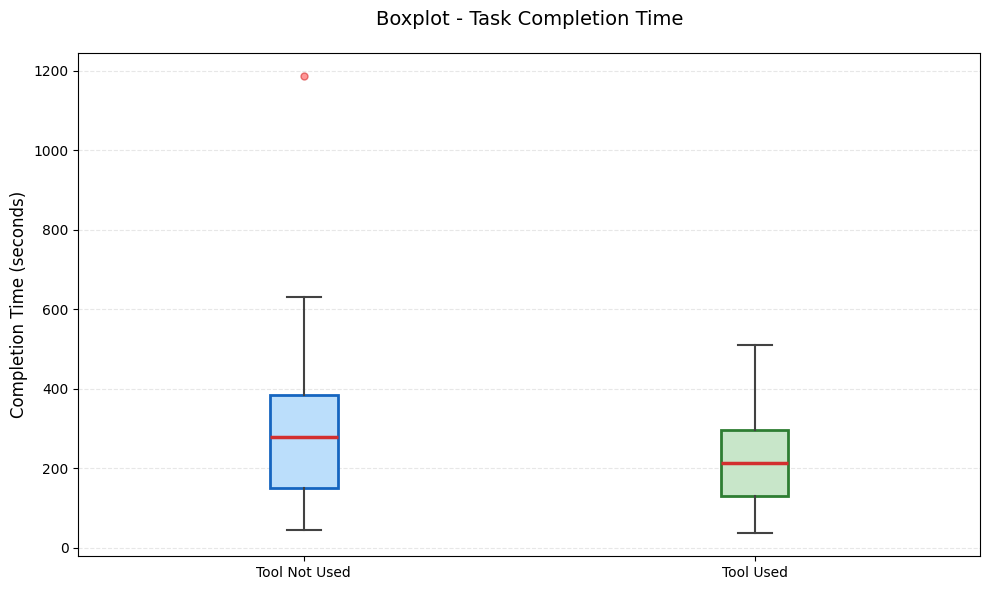

In [373]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Crea il boxplot
bp = plt.boxplot(
    [tool_not_used_df_script1["tempo_completamento_normalized_seconds"],
     tool_used_df_script1["tempo_completamento_normalized_seconds"]],
    labels=["Tool Not Used", "Tool Used"],
    patch_artist=True,
    medianprops=dict(color='#D32F2F', linewidth=2.5),
    whiskerprops=dict(color='#424242', linewidth=1.5),
    capprops=dict(color='#424242', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='#FF5252', markersize=5, linestyle='none', markeredgecolor='#D32F2F', alpha=0.6)
)

# Colori più leggibili e professionali
colors = ['#BBDEFB', '#C8E6C9']  # Blu pastello e verde pastello
edge_colors = ['#1565C0', '#2E7D32']  # Blu intenso e verde intenso

for patch, color, edge_color in zip(bp['boxes'], colors, edge_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(edge_color)
    patch.set_linewidth(2)

plt.ylabel("Completion Time (seconds)", fontsize=12)
plt.title("Boxplot - Task Completion Time", fontsize=14, pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig("../figures/boxplot_tempo_completamento.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [374]:
from scipy.stats import shapiro

shapiro(tool_used_df_script1["tempo_completamento_normalized_seconds"])

ShapiroResult(statistic=np.float64(0.9583047093445651), pvalue=np.float64(0.1904874298460005))

In [375]:
shapiro(tool_not_used_df_script1["tempo_completamento_normalized_seconds"])

ShapiroResult(statistic=np.float64(0.8361610915588382), pvalue=np.float64(9.286630465915157e-05))

In [376]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(
    tool_used_df_script1["tempo_completamento_normalized_seconds"],
    tool_not_used_df_script1["tempo_completamento_normalized_seconds"],
)

print("Statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Possiamo rigettare ipotesi nulla -> TARS migliora i tempi")
else:
    print("NON Possiamo rigettare ipotesi nulla")

Statistic: 494.5
p-value: 0.08476728681100713
NON Possiamo rigettare ipotesi nulla


## Analisi sulla similarità del testo con la docstring

In [377]:
from sentence_transformers import SentenceTransformer

#model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")
#model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
model = SentenceTransformer("intfloat/multilingual-e5-base")

```
@article{wang2024multilingual,
  title={Multilingual E5 Text Embeddings: A Technical Report},
  author={Wang, Liang and Yang, Nan and Huang, Xiaolong and Yang, Linjun and Majumder, Rangan and Wei, Furu},
  journal={arXiv preprint arXiv:2402.05672},
  year={2024}
}
```

In [378]:
DATASET_FOLDER_PATH = "../output_files/explanations/java"

oracles = {}
files = [f for f in os.listdir(DATASET_FOLDER_PATH)
              if os.path.isfile(os.path.join(DATASET_FOLDER_PATH, f))]


for index, file in enumerate(files):
    txt_file_path = os.path.join(DATASET_FOLDER_PATH, file)
    with open(txt_file_path, "r", encoding="utf-8") as f:
        file_content = f.read()
    oracles[f"""{file.split(".txt")[0]}"""] = file_content


### Translate italian to english

In [379]:
import openai
from dotenv import load_dotenv
import tqdm
import os
tqdm.tqdm.pandas()

load_dotenv("../.env")

translate_prompt = """You are a smart text translator. Your task is to translate the italian text in english. Provide only the translation, without any introductive text.
Italian Text: {italian_description}"""

def translate_description(row):
    api_key = os.getenv("OPENAI_API_KEY")
    client = openai.OpenAI(api_key=api_key)

    prompt = translate_prompt.format(italian_description=row["Descrizione"])

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a helpful translation assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    translated_text = response.choices[0].message.content.strip()
    row["english_description"] = translated_text
    return row


rq_1_df = rq_1_df.progress_apply(translate_description, axis=1) # type: ignore


100%|██████████| 72/72 [03:27<00:00,  2.88s/it]


In [380]:
rq_1_df.columns

Index(['Script', 'Descrizione', 'tempo_completamento', 'tool_used',
       'participant', 'tempo_completamento_normalized',
       'tempo_completamento_normalized_seconds', 'english_description'],
      dtype='object')

In [397]:
rq_1_df["english_description"]

0     Initialize the current time, return the list o...
1     Conversion of an array of integers or floats t...
2     Returns the cache of the input file, input = F...
3     It converts the command string into various bo...
4     The script in question concerns an "acquire" f...
                            ...                        
67    The method takes a string as input and checks ...
68    We have a function that returns a boolean. Onc...
69    We have a function that instantiates a tokeniz...
70    We have a function that takes care of deleting...
71    This function is responsible for acquiring fil...
Name: english_description, Length: 72, dtype: object

### LLM EVALUATION

In [418]:
user_prompt = """
Your task is to verify whether the user’s explanation correctly matches the Java method’s docstring.
We are not concerned with the level of detail in the explanation; what matters is whether, at a high level, the user has understood what the function does.

In other words, check if the explanation is coherent with what the docstring describes, regardless of how much detail the user provides. User explanations are typically longer, more detailed, and written in a conversational style compared to the concise technical description found in the docstring.

Docstring: {docstring}

User Explanation: {explanation}

Java Code: {code}

Respond only with one of the following options, without any additional text:
	•	Fully correct
	•	Partially correct
	•	Not Correct
Docstring: {docstring}

User Explanation: {explanation}

Java Code: {code}

Never add any other text, respond only with one of the following, without any introductive text: 
Fully correct
Partially correct
Not Correct
"""

def llm_eval_description(oracle, user_explanation, java_code):
    api_key = os.getenv("OPENAI_API_KEY")
    client = openai.OpenAI(api_key=api_key)

    prompt = user_prompt.format(docstring=oracle, explanation=user_explanation, code=java_code)
    

    response = client.chat.completions.create(
        model="gpt-4.1",
        messages=[
            {"role": "system", "content": prompt}
        ],
        temperature=0
    )

    llm_response = response.choices[0].message.content.strip()
    return llm_response


rq_1_df["LLM_response"] = rq_1_df.progress_apply(
    lambda row: llm_eval_description(
        oracle=oracles[str(row["Script"])],
        user_explanation=row["english_description"],
        java_code=code_snippets[row["Script"]]
    ),
    axis=1
)

  0%|          | 0/72 [00:00<?, ?it/s]

100%|██████████| 72/72 [01:44<00:00,  1.46s/it]


In [419]:
rq_1_df.columns

Index(['Script', 'Descrizione', 'tempo_completamento', 'tool_used',
       'participant', 'tempo_completamento_normalized',
       'tempo_completamento_normalized_seconds', 'english_description',
       'LLM_response'],
      dtype='object')

In [420]:
pd.set_option("max_colwidth", 1000)
pd.set_option("display.max_rows", 1000)
rq_1_df[["Script", "Descrizione", "LLM_response"]].sort_values(by="Script").reset_index(drop=True)

,Script,Descrizione,LLM_response
0,1,"Inizializza il tempo attuale, ritorna la lista dei file nella direcotry data e lancia un eccezione se la directory è invalida o non accessibile. Input = File, Formatter, boolean, output = void. Utilizza un ciclo per visualizzare tutti i file. Se c'è una subdir chiama la funzione in maniera ricorsiva. Se il file è più grande del tempo settato lo cancella",Partially correct
1,1,"Lo script permette di effettuare una pulizia della cache. Gestisce il caso in cui la directory corrente non è la root oppure risulta vuota ed effettua un'iterazione ricorsiva per ogni subdirectory, controllando lo se ogni file deve restare in cache o meno.",Partially correct
2,1,"Scopo:\nRipulire/Eliminare file la cui ultima modifica supera un certo periodo di tempo\n\nInput:\nLa funzione prende in input una directory, un formattatore di File e un booleano\n\nOutput:\nSiccome la funzione è void, non è presente alcun output\n\nLogica principale:\nSe il file passato in input è Null, viene lanciata un’eccezione.\nAltrimenti vengono effettuati dei controlli sul file passato. Se è una directory non è la root, ed è vuota, controlla quando è stata effettuata l’ultima modifica alla cartella stessa. Se supera un certo ammontare id tempo, tenta di cancellarla. Se si verifica un errore, viene mostrato. Tale metodo, una volta effettuate queste operazioni, ritorna subito per evitare si compiere ulteriori operazioni.\nSe questo non avviene (e quindi la cartella non è vuota), si controlla ogni file, ed eventualmente anche sottocartella in maniera ricorsiva. Per ogni file, se l’ultima modifica supera l’ammontare di tempo definito le cancella se necessario. Infine, viene co...",Fully correct
3,1,Abbiamo una funzione che si occupa di eliminare dei file. Il primo if controlla se ci sono file se non ci sono lancia un exception. Nel secondo if credo che quell isRoot controlli se si hanno i permessi e se con i minuti corrispondono ma sopratutto se sono stati eliminati tutti i file. Se è tutto ok allora elimina la cartella altrimenti si possono anadare in if in caso di errore e non eliminare. Abbiamo un for principale che si occupa di chiamare la funzione e svolgere il tutto.,Partially correct
4,1,". Prima di tutto viene effettuato un controllo se la directory è effettivamente esistente successivamente se la directory risulta essere esistente viene effettuato un primo controllo per capire se la directory è di root, se risulta essere di root viene restituito un output con scritto ""Unable to delete file"", in caso contrario resituisce in output l'ora della modifica e dell'ultima modifica. Successivamene viene effettuato lo stesso controllo sui file della directory, se i file non possono essere eliminati restituisce in output ""Unable to delete file"" con il path assoluto dei file, in caso contrario elimina i file della directory restituendo in output il momento dell'ultima modifica.",Partially correct
5,1,"Lo scopo di questo script è quello di ripulire la cache di una directory e non sono restituiti output\nGli input sono:\n - Un'istanza dir della classe File\n - Un'istanza sbuffer della classe Formatter\n - Una variabile isRoot di tipo boolean\nNon ci sono output\nLa logica di questo script prevede:\n - Si recupera il tempo iniziale nella variabile now\n - Si recuperano i file da dir\n - Se l'array files è null viene sollevata l'eccezione IllegalStateException\n - Nel branch then relativo al controllo che isRoot sia false e l'array di files sia vuoto, si recupera il tempo dell'ultimo file modificato nella directory e se questo tempo è superiore a persistMinutes, viene cancellata la directory andando ad effettuare il log sia in caso di cancellazione con successo che con insuccesso e infine si esce dallo script tramite una return\n - Con il for successivo, si vanno ad esplorare e cancellare ricorsivamente tutti i file ed eventuali subdirectory, seguendo una logica simile a quella del...",Partially correct
6,1,"Il metodo, dopo aver segnato l'

In [421]:
rq_1_df[rq_1_df["tool_used"]==True]["LLM_response"].value_counts()

LLM_response
Partially correct    27
Fully correct         7
Not Correct           2
Name: count, dtype: int64

In [422]:
rq_1_df[rq_1_df["tool_used"]==False]["LLM_response"].value_counts()

LLM_response
Partially correct    29
Not Correct           4
Fully correct         3
Name: count, dtype: int64

### COsine similarity

In [384]:
tool_used_scores = []
tool_not_used_scores = []

In [385]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_and_stem_sentence(sentence: str) -> str:
    sentence = sentence.lower()
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    tokens = nltk.word_tokenize(sentence)
    stemmed_tokens = [stemmer.stem(t) for t in tokens if t not in stop_words]
    return " ".join(stemmed_tokens)

In [386]:
def get_similarity(sentences: list[str], oracle: str):
    cleaned_sentences = [clean_and_stem_sentence(s) for s in sentences]
    cleaned_oracle = clean_and_stem_sentence(oracle)
    
    embeddings_sentences = model.encode(cleaned_sentences)
    embedding_oracle = model.encode([cleaned_oracle])
    similarities = model.similarity(embeddings_sentences, embedding_oracle)
    return similarities

In [387]:
tool_used_oracle = oracles["1"]
tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 1) & (rq_1_df["tool_used"]==True)]["english_description"].to_list()
tool_used_avg_score = get_similarity(tool_used_script1_sentences, tool_used_oracle).numpy().mean()
tool_used_scores.append(tool_used_avg_score)

not_tool_used_oracle = oracles["1"]
not_tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 1) & (rq_1_df["tool_used"]==False)]["english_description"].to_list()
not_tool_used_avg_score = get_similarity(not_tool_used_script1_sentences, not_tool_used_oracle).numpy().mean()
tool_not_used_scores.append(not_tool_used_avg_score)
tool_used_avg_score, not_tool_used_avg_score

(np.float32(0.89456195), np.float32(0.88947695))

In [388]:
tool_used_oracle = oracles["2"]
tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 2) & (rq_1_df["tool_used"]==True)]["english_description"].to_list()
tool_used_avg_score = get_similarity(tool_used_script1_sentences, tool_used_oracle).numpy().mean()
tool_used_scores.append(tool_used_avg_score)

not_tool_used_oracle = oracles["2"]
not_tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 2) & (rq_1_df["tool_used"]==False)]["english_description"].to_list()
not_tool_used_avg_score = get_similarity(not_tool_used_script1_sentences, not_tool_used_oracle).numpy().mean()
tool_not_used_scores.append(not_tool_used_avg_score)

tool_used_avg_score, not_tool_used_avg_score

(np.float32(0.8965558), np.float32(0.88763267))

In [389]:
tool_used_oracle = oracles["3"]
tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 3) & (rq_1_df["tool_used"]==True)]["english_description"].to_list()
tool_used_avg_score = get_similarity(tool_used_script1_sentences, tool_used_oracle).numpy().mean()
tool_used_scores.append(tool_used_avg_score)

not_tool_used_oracle = oracles["3"]
not_tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 3) & (rq_1_df["tool_used"]==False)]["english_description"].to_list()
not_tool_used_avg_score = get_similarity(not_tool_used_script1_sentences, not_tool_used_oracle).numpy().mean()
tool_not_used_scores.append(not_tool_used_avg_score)

tool_used_avg_score, not_tool_used_avg_score

(np.float32(0.8836463), np.float32(0.8859802))

In [390]:
tool_used_oracle = oracles["4"]
tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 4) & (rq_1_df["tool_used"]==True)]["english_description"].to_list()
tool_used_avg_score = get_similarity(tool_used_script1_sentences, tool_used_oracle).numpy().mean()
tool_used_scores.append(tool_used_avg_score)

not_tool_used_oracle = oracles["4"]
not_tool_used_script1_sentences = rq_1_df[(rq_1_df["Script"] == 4) & (rq_1_df["tool_used"]==False)]["english_description"].to_list()
not_tool_used_avg_score = get_similarity(not_tool_used_script1_sentences, not_tool_used_oracle).numpy().mean()
tool_not_used_scores.append(not_tool_used_avg_score)

tool_used_avg_score, not_tool_used_avg_score

(np.float32(0.8796558), np.float32(0.878023))

### Data analysis

In [391]:
from scipy.stats import shapiro

shapiro(tool_not_used_scores)

ShapiroResult(statistic=np.float64(0.8698096851394599), pvalue=np.float64(0.2969373985888294))

In [392]:
from scipy.stats import shapiro

shapiro(tool_used_scores)

ShapiroResult(statistic=np.float64(0.8869062948582599), pvalue=np.float64(0.3689718738393203))

In [393]:
scores_data = [np.array(tool_not_used_scores), np.array(tool_used_scores)]
labels = ["Tool Not Used", "Tool Used"]

f"""Cosine similarity per explanation for tool NOT used: {pd.DataFrame(tool_not_used_scores).describe().to_dict()}""",f"""Cosine similarity per explanation for tool used: {pd.DataFrame(tool_used_scores).describe().to_dict()}"""

("Cosine similarity per explanation for tool NOT used: {0: {'count': 4.0, 'mean': 0.8852782249450684, 'std': 0.005043258424848318, 'min': 0.8780230283737183, '25%': 0.8839908987283707, '50%': 0.8868064284324646, '75%': 0.8880937397480011, 'max': 0.8894769549369812}}",
 "Cosine similarity per explanation for tool used: {0: {'count': 4.0, 'mean': 0.8886049389839172, 'std': 0.008233616128563881, 'min': 0.8796557784080505, '25%': 0.8826486766338348, '50%': 0.8891041278839111, '75%': 0.8950604051351547, 'max': 0.8965557813644409}}")

/var/folders/fx/zsdh_8412glbjpkff1h6xdlh0000gn/T/ipykernel_49903/3290989821.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp_scores = plt.boxplot(


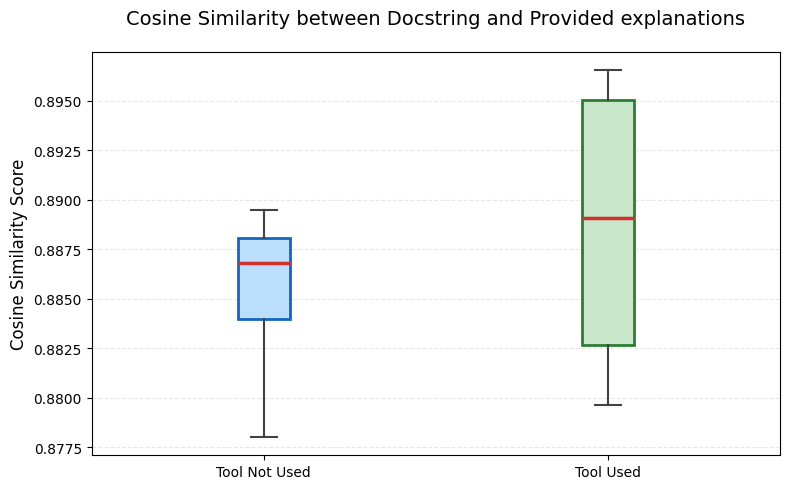

In [394]:
import matplotlib.pyplot as plt

scores_data = [np.array(tool_not_used_scores), np.array(tool_used_scores)]
labels = ["Tool Not Used", "Tool Used"]

plt.figure(figsize=(8, 5))
bp_scores = plt.boxplot(
    scores_data,
    labels=labels,
    patch_artist=True,
    medianprops=dict(color='#D32F2F', linewidth=2.5),
    whiskerprops=dict(color='#424242', linewidth=1.5),
    capprops=dict(color='#424242', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='#FF5252', markersize=5, linestyle='none', markeredgecolor='#D32F2F', alpha=0.6)
)

box_colors = ['#BBDEFB', '#C8E6C9']
edge_colors = ['#1565C0', '#2E7D32']

for patch, color, edge_color in zip(bp_scores['boxes'], box_colors, edge_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(edge_color)
    patch.set_linewidth(2)

plt.ylabel("Cosine Similarity Score", fontsize=12)
plt.title("Cosine Similarity between Docstring and Provided explanations", fontsize=14, pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()


plt.savefig("../figures/boxplot_cosine_similarity.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

In [395]:
np.array(tool_not_used_scores).mean(), np.array(tool_used_scores).mean()

(np.float32(0.8852782), np.float32(0.88860494))

In [396]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(
    tool_not_used_scores,
    tool_used_scores,
    equal_var=False  # meglio usare Welch’s t-test se le varianze potrebbero differire
)

print("Statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Possiamo rigettare l'ipotesi nulla: differenza significativa tra i gruppi.")
else:
    print("NON possiamo rigettare l'ipotesi nulla: differenza non significativa.")

Statistic: -0.6890882839207598
p-value: 0.5215901744127192
NON possiamo rigettare l'ipotesi nulla: differenza non significativa.
